In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime as dt

In [2]:
df = web.DataReader('0050.TW','yahoo',start='2018-01-01')

In [3]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,82.599998,82.150002,82.150002,82.599998,3613199,82.599998
2018-01-03,83.449997,82.949997,82.949997,83.349998,7196437,83.349998
2018-01-04,83.650002,83.199997,83.500000,83.500000,5627565,83.500000
2018-01-05,83.800003,83.300003,83.500000,83.750000,7616796,83.750000
2018-01-08,84.150002,83.699997,83.800003,84.099998,5189611,84.099998
...,...,...,...,...,...,...
2021-02-02,135.050003,132.500000,132.500000,134.449997,10888373,134.449997
2021-02-03,135.500000,134.199997,135.449997,134.350006,7081970,134.350006
2021-02-04,134.550003,132.350006,133.399994,133.550003,6558479,133.550003


**運用前一天的volume去預測後一天股價開盤價-以LSTM為例**

In [82]:
#進行資料正規畫
def regularize(data):
    data_train = data.apply(lambda x:((x - np.mean(x)) /(np.max(x) - np.min(x))),axis = 0) #axis = 0 -> columns
    return data_train

In [83]:
df_r = regularize(df)
df_r

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,-0.092393,-0.086476,-0.098310,-0.083978,-0.077240,-0.083978
2018-01-03,-0.080628,-0.075326,-0.086545,-0.073904,-0.024916,-0.073904
2018-01-04,-0.077860,-0.071841,-0.078457,-0.071890,-0.047825,-0.071890
2018-01-05,-0.075784,-0.070448,-0.078457,-0.068532,-0.018777,-0.068532
2018-01-08,-0.070939,-0.064873,-0.074045,-0.063831,-0.054220,-0.063831
...,...,...,...,...,...,...
2021-02-02,0.633559,0.615267,0.642131,0.612462,0.028996,0.612462
2021-02-03,0.639787,0.638960,0.685514,0.611119,-0.026587,0.611119
2021-02-04,0.626639,0.613176,0.655366,0.600374,-0.034231,0.600374


In [84]:
#新增一行Open向後移一天
df_new = df_r['Volume'].shift(1).rename('lag_Vol')
df_r1 = pd.concat([df_r,df_new],axis=1)

In [85]:
df_r1 = df_r1.dropna()

In [86]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [87]:
#x_train, x_test, y_train, y_test = train_test_split(df_r1['lag_Vol'],df_r1['Open'],test_size=0.2,random_state=80)

In [88]:
x_train = df_r1['lag_Vol'].iloc[:600] #訓練資料取前600筆
x_test = df_r1['lag_Vol'].iloc[600:]
y_train = df_r1['Open'].iloc[:600]
y_test = df_r1['Open'].iloc[600:]

In [89]:
x_train,y_train

(Date
 2018-01-03   -0.077240
 2018-01-04   -0.024916
 2018-01-05   -0.047825
 2018-01-08   -0.018777
 2018-01-09   -0.054220
                 ...   
 2020-06-19   -0.056467
 2020-06-22   -0.095920
 2020-06-23    0.024485
 2020-06-24   -0.003472
 2020-06-29    0.016928
 Name: lag_Vol, Length: 600, dtype: float64,
 Date
 2018-01-03   -0.086545
 2018-01-04   -0.078457
 2018-01-05   -0.078457
 2018-01-08   -0.074045
 2018-01-09   -0.069633
                 ...   
 2020-06-19    0.002425
 2020-06-22    0.000219
 2020-06-23    0.011249
 2020-06-24    0.014190
 2020-06-29    0.006102
 Name: Open, Length: 600, dtype: float64)

In [90]:
x_test,y_test

(Date
 2020-06-30    0.012884
 2020-07-01   -0.012668
 2020-07-02    0.015721
 2020-07-03   -0.019001
 2020-07-06    0.088790
                 ...   
 2021-02-02    0.076376
 2021-02-03    0.028996
 2021-02-04   -0.026587
 2021-02-05   -0.034231
 2021-02-17   -0.001503
 Name: lag_Vol, Length: 156, dtype: float64,
 Date
 2020-06-30    0.010514
 2020-07-01    0.016396
 2020-07-02    0.026690
 2020-07-03    0.048014
 2020-07-06    0.064190
                 ...   
 2021-02-02    0.642131
 2021-02-03    0.685514
 2021-02-04    0.655366
 2021-02-05    0.675955
 2021-02-17    0.737720
 Name: Open, Length: 156, dtype: float64)

In [91]:
x_train.shape,x_test.shape,y_train.shape

((600,), (156,), (600,))

In [92]:
x_train = np.array(x_train).reshape(1,600,1) #1個樣本，601個時間步長和1個特徵
x_test = np.array(x_test).reshape(1,156,1)
y_train = np.array(y_train).reshape(1,600,1)
y_test = np.array(y_test).reshape(1,156,1)

In [197]:
model = Sequential()
#model.build()
model.add(LSTM(50,return_sequences = True, input_shape=(None,1)))
model.add(Dropout(0.2))
#model.add(LSTM(50,return_sequences = True))
#model.add(Dropout(0.2))
model.add(Dense(1))

In [198]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, None, 50)          10400     
_________________________________________________________________
dropout_6 (Dropout)          (None, None, 50)          0         
_________________________________________________________________
dense_4 (Dense)              (None, None, 1)           51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [199]:
model.compile(loss = 'mean_squared_error',
              optimizer='adam', 
              metrics=['accuracy'])

In [200]:
model.fit(x_train, y_train,batch_size=30,epochs=10)

Epoch 1/10
1/1 [==============================] - 1s 562ms/step - loss: 0.0153 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 158ms/step - loss: 0.0135 - accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 160ms/step - loss: 0.0116 - accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 163ms/step - loss: 0.0102 - accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 166ms/step - loss: 0.0089 - accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 161ms/step - loss: 0.0077 - accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 163ms/step - loss: 0.0070 - accuracy: 0.0000e+00
Epoch 8/10
1/1 [==============================] - 0s 160ms/step - loss: 0.0063 - accuracy: 0.0000e+00
Epoch 9/10
1/1 [==============================] - 0s 162ms/step - loss: 0.0061 - accuracy: 0.0000e+00
Epoch 10/10
1/1 [==============================] - 0s 163ms/step - loss: 0.0058 - 

In [201]:
score = model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 130ms/step


In [202]:
print('測試資料的loss',score[0]) #相當不準確
print('測試資料的正確率',score[1])

測試資料的loss 0.20584893226623535
測試資料的正確率 0.0


**以前一天收盤價預測後一天收盤價**

In [100]:
df_new2 = df_r['Close'].shift(1).rename('lag_Close')
df_r2 = pd.concat([df_r,df_new2],axis=1)

In [101]:
df_r2 = df_r2.dropna()

In [102]:
df_r2

,High,Low,Open,Close,Volume,Adj Close,lag_Close
Date,,,,,,,
2018-01-03,-0.080628,-0.075326,-0.086545,-0.073904,-0.024916,-0.073904,-0.083978
2018-01-04,-0.077860,-0.071841,-0.078457,-0.071890,-0.047825,-0.071890,-0.073904
2018-01-05,-0.075784,-0.070448,-0.078457,-0.068532,-0.018777,-0.068532,-0.071890
2018-01-08,-0.070939,-0.064873,-0.074045,-0.063831,-0.054220,-0.063831,-0.068532
2018-01-09,-0.069555,-0.062085,-0.069633,-0.063159,-0.076488,-0.063159,-0.063831
...,...,...,...,...,...,...,...
2021-02-02,0.633559,0.615267,0.642131,0.612462,0.028996,0.612462,0.562765
2021-02-03,0.639787,0.638960,0.685514,0.611119,-0.026587,0.611119,0.612462
2021-02-04,0.626639,0.613176,0.655366,0.600374,-0.034231,0.600374,0.611119


In [103]:
x_train2 = df_r2['lag_Close'].iloc[:600] #訓練資料取前600筆
x_test2 = df_r2['lag_Close'].iloc[600:]
y_train2 = df_r2['Close'].iloc[:600]
y_test2 = df_r2['Close'].iloc[600:]

In [104]:
x_train2,y_train2

(Date
 2018-01-03   -0.083978
 2018-01-04   -0.073904
 2018-01-05   -0.071890
 2018-01-08   -0.068532
 2018-01-09   -0.063831
                 ...   
 2020-06-19    0.000642
 2020-06-22   -0.000029
 2020-06-23    0.002657
 2020-06-24    0.008030
 2020-06-29    0.015417
 Name: lag_Close, Length: 600, dtype: float64,
 Date
 2018-01-03   -0.073904
 2018-01-04   -0.071890
 2018-01-05   -0.068532
 2018-01-08   -0.063831
 2018-01-09   -0.063159
                 ...   
 2020-06-19   -0.000029
 2020-06-22    0.002657
 2020-06-23    0.008030
 2020-06-24    0.015417
 2020-06-29    0.003329
 Name: Close, Length: 600, dtype: float64)

In [105]:
x_train2.shape,x_test2.shape,y_train2.shape

((600,), (156,), (600,))

In [106]:
x_train2 = np.array(x_train2).reshape(1,600,1) #1個樣本，601個時間步長和1個特徵
x_test2 = np.array(x_test2).reshape(1,156,1)
y_train2 = np.array(y_train2).reshape(1,600,1)
y_test2 = np.array(y_test2).reshape(1,156,1)

In [212]:
model.fit(x_train2, y_train2,batch_size=30,epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 159ms/step - loss: 0.0020 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 159ms/step - loss: 0.0019 - accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 158ms/step - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 161ms/step - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 157ms/step - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 157ms/step - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 159ms/step - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 8/10
1/1 [==============================] - 0s 163ms/step - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 9/10
1/1 [==============================] - 0s 159ms/step - loss: 0.0010 - accuracy: 0.0000e+00
Epoch 10/10
1/1 [==============================] - 0s 161ms/step - loss: 9.5219e-0

In [213]:
score2 = model.evaluate(x_test2,y_test2)

1/1 [==============================] - 0s 12ms/step


In [214]:
print('測試資料的loss',score2[0]) #相當不準確，但loss較少
print('測試資料的正確率',score2[1])

測試資料的loss 0.018089989200234413
測試資料的正確率 0.0


**視覺化**

In [215]:
x_predict1 = model.predict(x_test) #volumn預測open
x_predict2 = model.predict(x_test2) #close預測close

In [216]:
x_predict1

array([[[-0.0050251 ],
        [-0.00860971],
        [-0.00870059],
        [-0.0112203 ],
        [-0.00357125],
        [ 0.00385803],
        [ 0.01038303],
        [ 0.01274249],
        [ 0.00930491],
        [ 0.01094806],
        [ 0.01330747],
        [ 0.01746714],
        [ 0.03172157],
        [ 0.02786608],
        [ 0.03653379],
        [ 0.03383953],
        [ 0.05028416],
        [ 0.04396865],
        [ 0.03497785],
        [ 0.04046759],
        [ 0.05350009],
        [ 0.06581978],
        [ 0.06110061],
        [ 0.05132111],
        [ 0.03934615],
        [ 0.03009582],
        [ 0.01838588],
        [ 0.00789929],
        [ 0.00156828],
        [-0.00440464],
        [-0.01063936],
        [-0.01973421],
        [-0.02451489],
        [-0.02897857],
        [-0.03499714],
        [-0.03792147],
        [-0.04273679],
        [-0.04396526],
        [-0.02735051],
        [-0.02446883],
        [-0.02833013],
        [-0.03305272],
        [-0.03923338],
        [-0

In [217]:
x_predict1 = x_predict1.reshape(156,)
x_predict2 = x_predict2.reshape(156,)

In [218]:
len(x_predict1),len(x_predict2)

(156, 156)

In [219]:
x_predict1 = list(x_predict1)
x_predict2 = list(x_predict2)

In [220]:
x_predict1

[-0.0050250976,
 -0.008609712,
 -0.008700587,
 -0.011220302,
 -0.0035712519,
 0.003858028,
 0.01038303,
 0.012742493,
 0.009304911,
 0.010948056,
 0.013307467,
 0.017467143,
 0.031721566,
 0.02786608,
 0.036533788,
 0.033839535,
 0.050284162,
 0.043968648,
 0.034977853,
 0.04046759,
 0.05350009,
 0.06581978,
 0.061100613,
 0.051321108,
 0.039346155,
 0.03009582,
 0.018385882,
 0.007899294,
 0.0015682827,
 -0.0044046417,
 -0.01063936,
 -0.019734211,
 -0.024514891,
 -0.02897857,
 -0.03499714,
 -0.03792147,
 -0.042736795,
 -0.043965258,
 -0.027350506,
 -0.024468834,
 -0.028330134,
 -0.03305272,
 -0.039233375,
 -0.041137524,
 -0.044975825,
 -0.045992166,
 -0.046609588,
 -0.049143966,
 -0.050195605,
 -0.049929697,
 -0.050026115,
 -0.0514066,
 -0.05034984,
 -0.052834716,
 -0.056329824,
 -0.05584039,
 -0.05544871,
 -0.0420458,
 -0.036700726,
 -0.03725073,
 -0.037552245,
 -0.03694438,
 -0.038207,
 -0.025471097,
 -0.021015953,
 -0.021948686,
 -0.026655234,
 -0.03205757,
 -0.034211814,
 -0.03466

In [160]:
df['Open'].mean()

88.83507266731212

In [161]:
(df['Open'].max() - df['Open'].min())

68.0

In [221]:
#去正規化
x_predict1_d = list(map(lambda x:(x*(df['Open'].max() - df['Open'].min()) + df['Open'].mean()),x_predict1))
x_predict2_d = list(map(lambda x:(x*(df['Close'].max() - df['Close'].min()) + df['Close'].mean()),x_predict2))

In [222]:
x_predict1_d

[88.49336602815637,
 88.2496122428889,
 88.24343276114413,
 88.07209210188338,
 88.59222753995309,
 89.09741856993386,
 89.54111873449037,
 89.70156221182296,
 89.4678066083903,
 89.5795404994602,
 89.73998043031642,
 90.02283839226911,
 90.99213914663741,
 90.72996613473842,
 91.31937024087856,
 91.13616104514549,
 92.25439569444606,
 91.82494071216533,
 91.21356669158885,
 91.58686879367778,
 92.47307877333114,
 93.31081754059741,
 92.98991437346885,
 92.32490800411651,
 91.51061119229743,
 90.88158838541457,
 90.08531261326024,
 89.37222463728139,
 88.94171589237848,
 88.53555703253696,
 88.11159617544362,
 87.49314630122134,
 87.16806006522128,
 86.86452994586179,
 86.45526720673988,
 86.25641273052642,
 85.92897062094161,
 85.84543514342258,
 86.9752382719631,
 87.17119198383043,
 86.90862353981683,
 86.5874876985068,
 86.16720314414451,
 86.03772103877017,
 85.77671659083316,
 85.70760539264629,
 85.6656206855292,
 85.49328295977065,
 85.42177155704448,
 85.43985326678703,
 85.43

In [223]:
x_predict2_d

[88.41340845264834,
 88.32642443539305,
 88.36948743889738,
 88.54960559267471,
 88.84906333738843,
 89.29795163217639,
 89.76632319750006,
 90.26286682151503,
 90.74546747567292,
 91.108673346672,
 91.54502139302959,
 91.9881661258324,
 92.4189281091159,
 92.71682854564428,
 93.0621013819228,
 93.35170911769576,
 93.74464085405488,
 94.12136909689447,
 94.448168624838,
 94.70214936501772,
 95.32935544467445,
 95.94229752433615,
 96.41153292421133,
 96.94568879973953,
 97.3972599149621,
 97.6370587501108,
 97.93037351726493,
 98.2618580051135,
 98.64414540828558,
 98.9233415057188,
 99.23957019765591,
 99.45036233042312,
 99.49711208424698,
 99.59607201639211,
 99.6945915201493,
 99.86718397865413,
 99.97516880988225,
 100.00558832221851,
 99.72244279138205,
 99.6132820052642,
 99.53595742430731,
 99.53597739335261,
 99.57833728538527,
 99.64614883504079,
 99.62780393876098,
 99.46717737595488,
 99.43461451942336,
 99.37956429910425,
 99.35615392166734,
 99.2768690460971,
 99.190581691

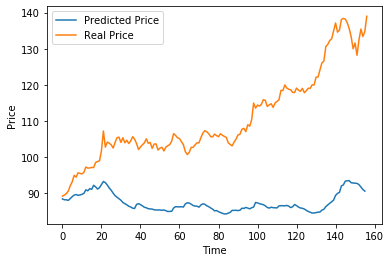

In [234]:
#open
plt.plot(x_predict1_d,label = 'Predicted Price')
plt.plot(df['Open'].iloc[600:].values,label = 'Real Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

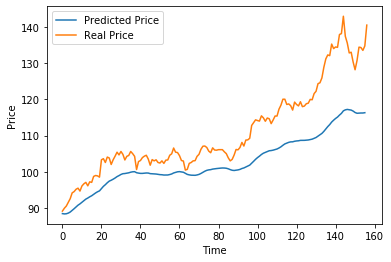

In [235]:
#close
plt.plot(x_predict2_d,label = 'Predicted Price')
plt.plot(df['Close'].iloc[600:].values,label = 'Real Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

用前一天Close price預測股價較符合股價趨勢，但也非常不準確

若以交易量預測是相當沒參考性，可考慮以超買超賣量來進行預測較佳

簡單來說需要多學習模型參數如何調整與建置，輸入資料特性了解等